# Analyze spatial correlation

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

In [6]:
import sys
sys.path.insert(0, "../src")

import fields

## Load and view data

In [2]:
# read 5-degree monthly data and subset to US for faster testing
time = "2019-07-01"
ds = xr.open_dataset("../data/exp_pro/OCO2_5deg_monthly.nc")

ds

<xarray.Dataset>
Dimensions:   (lat: 35, lon: 72, time: 75)
Coordinates:
  * lon       (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat       (lat) float64 -87.5 -82.5 -77.5 -72.5 ... 67.5 72.5 77.5 82.5
  * time      (time) datetime64[ns] 2014-09-01 2014-10-01 ... 2020-11-01
Data variables:
    sif       (lon, lat, time) float32 ...
    sif_var   (lon, lat, time) float32 ...
    xco2      (lon, lat, time) float32 ...
    xco2_var  (lon, lat, time) float32 ...

In [15]:
def ds_to_df(ds, timestamp):
    return ds.sel(time=timestamp).to_dataframe().reset_index()

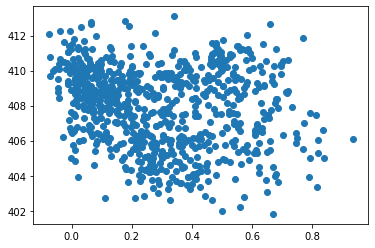

In [14]:
timestamp = "2019-07-01"
df = ds_to_df(ds, timestamp)

plt.scatter(df.sif, df.xco2)

In [17]:
def standardize(da):
    return (da - da.mean(dim="time")) / da.std(dim="time")

sif_ = standardize(ds.sif)
xco2_ = standardize(ds.xco2)

df_sif = ds_to_df(sif_, timestamp)
df_xco2 = ds_to_df(xco2_, timestamp)

/home/jj829/sif-data-fusion/conda-env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/jj829/sif-data-fusion/conda-env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


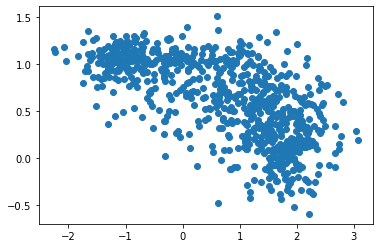

In [19]:
plt.scatter(df_sif.sif, df_xco2.xco2)